/Users/zhaotianfeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


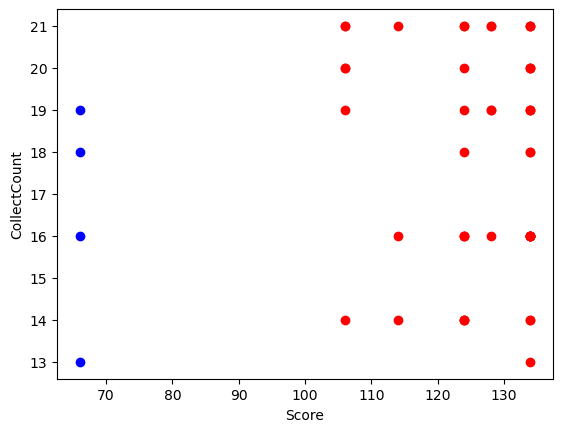

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data from CSV file
data = pd.read_csv('new_generated.csv')
X = data[['Score', 'CollectCount']].values

# Perform clustering with K-Means
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Add the labels as a new column in the original data frame
data['Performance'] = labels

# Save the labeled data to a new CSV file
data.to_csv('labeled_data.csv', index=False)

# Visualize the results
colors = ['red', 'blue']
for i in range(2):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], c=colors[i])
plt.xlabel('Score')
plt.ylabel('CollectCount')
plt.show()


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

data = pd.read_csv('labeled_data.csv')

data = data.drop('Score',axis=1)
data = data.drop('CollectCount',axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Performance',axis=1),
    data['Performance'], 
    test_size=0.2, 
    random_state=42
)

In [91]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
param_grid = {
    'max_depth': [1, 3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Define the grid search object
grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Train the grid search object on the training data
grid_search.fit(X_train, y_train)

importances = clf.feature_importances_

# Test the grid search object on the testing data
accuracy = grid_search.score(X_test, y_test)

print('Best parameters:', grid_search.best_params_)
print('Accuracy:', accuracy)

for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance}")

/Users/zhaotianfeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.9
Feature 0: 0.0
Feature 1: 0.0
Feature 2: 0.0
Feature 3: 0.0
Feature 4: 0.0
Feature 5: 0.0
Feature 6: 0.0
Feature 7: 0.0
Feature 8: 0.0
Feature 9: 0.3137254901960787
Feature 10: 0.0
Feature 11: 0.0
Feature 12: 0.0
Feature 13: 0.0
Feature 14: 0.0
Feature 15: 0.0
Feature 16: 0.0
Feature 17: 0.0
Feature 18: 0.2696078431372548
Feature 19: 0.0
Feature 20: 0.0
Feature 21: 0.0
Feature 22: 0.0
Feature 23: 0.0
Feature 24: 0.0
Feature 25: 0.4166666666666665
Feature 26: 0.0
Feature 27: 0.0
Feature 28: 0.0
Feature 29: 0.0


In [60]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = clf.fit(iris.data, iris.target)


import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

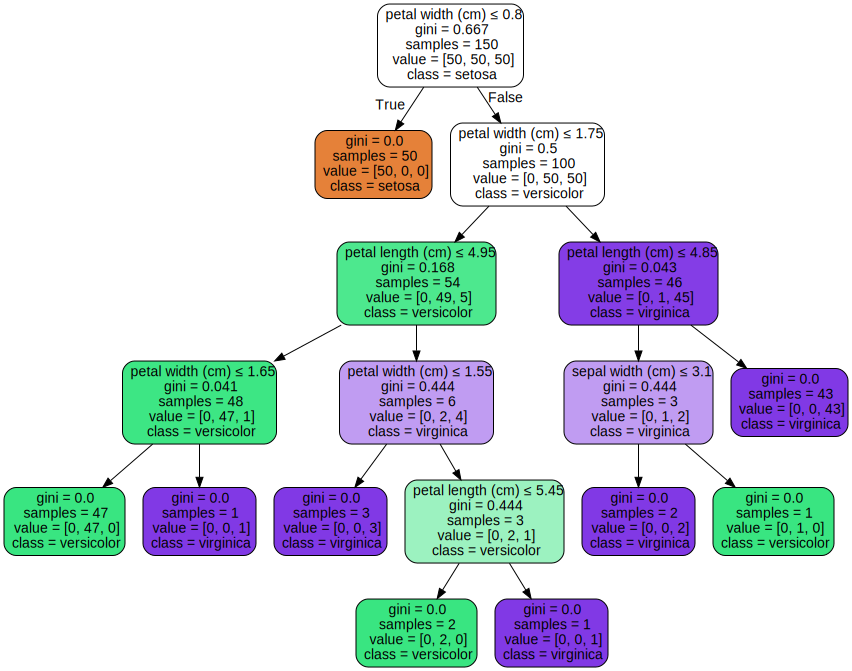

In [61]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [62]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
discrete_columns = ["point_one_speed","point_one_deviation","point_two_speed","point_two_deviation","point_three_speed","point_three_deviation",
"point_four_speed","point_four_deviation","point_five_speed","point_five_deviation","point_six_speed","point_six_deviation",
"point_seven_speed","point_seven_deviation","point_eight_speed","point_eight_deviation","point_nine_speed","point_nine_deviation",
"point_ten_speed","point_ten_deviation","point_eleven_speed","point_eleven_deviation","point_twelve_speed","point_twelve_deviation",
"point_thirteen_speed","point_thirteen_deviation","point_fourteen_speed","point_fourteen_deviation","point_fifteen_speed","point_fifteen_deviation","CollectCount","Score"
]
for name,correlation in zip(discrete_columns,model.feature_importances_):
    print(name, ":", correlation)

point_one_speed : 0.03750763917607029
point_one_deviation : 0.029386729176110626
point_two_speed : 0.03636676605241037
point_two_deviation : 0.032502054201164816
point_three_speed : 0.04867807724038374
point_three_deviation : 0.0183499336621942
point_four_speed : 0.026379359936180524
point_four_deviation : 0.030312379526089197
point_five_speed : 0.03678764149530278
point_five_deviation : 0.14951051617791314
point_six_speed : 0.020715336749543924
point_six_deviation : 0.015444477847255618
point_seven_speed : 0.02063956876456876
point_seven_deviation : 0.014532227032227037
point_eight_speed : 0.014894866251963436
point_eight_deviation : 0.04965400489983543
point_nine_speed : 0.025676331592279868
point_nine_deviation : 0.033633827885140855
point_ten_speed : 0.055120648123545564
point_ten_deviation : 0.020167630858420323
point_eleven_speed : 0.03140082000103346
point_eleven_deviation : 0.016823280969307807
point_twelve_speed : 0.04039260285407689
point_twelve_deviation : 0.0189661998181901

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif,VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from tensorflow import keras

2023-04-09 14:11:43.382947: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [68]:
performance = pd.read_csv('labeled_data.csv',index_col=None)
performance.describe()

,point_one_speed,point_one_deviation,point_two_speed,point_two_deviation,point_three_speed,point_three_deviation,point_four_speed,point_four_deviation,point_five_speed,point_five_deviation,...,point_twelve_deviation,point_thirteen_speed,point_thirteen_deviation,point_fourteen_speed,point_fourteen_deviation,point_fifteen_speed,point_fifteen_deviation,CollectCount,Score,Performance
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.372916,34.372668,1.200813,24.312758,1.527599,28.403784,1.410412,27.873647,1.240095,36.301742,...,40.833130,1.398554,20.015575,2.047078,29.678924,1.516862,24.001875,17.720000,121.200000,0.080000
std,0.543176,13.034231,0.992219,16.360280,0.770987,17.683815,0.708713,13.717098,1.112663,21.158815,...,25.967531,0.600599,11.519886,0.728581,21.270246,1.357638,12.623542,2.603295,18.891743,0.274048
min,0.841993,10.612557,0.228964,13.712780,0.889602,9.590120,0.683298,8.791589,0.122040,12.444461,...,9.338154,0.538023,7.008839,0.756757,16.334832,0.629213,12.636836,13.000000,66.000000,0.000000
25%,1.031261,30.089811,0.644807,16.046416,1.071914,11.759828,0.949604,16.184478,0.548671,17.679052,...,16.991061,1.084692,11.035946,1.744218,17.233237,0.884005,12.636836,16.000000,116.500000,0.000000
50%,1.293036,32.946200,0.945383,18.842723,1.484345,29.587877,1.179525,24.554250,0.808400,29.810227,...,28.650617,1.370480,17.377983,2.345308,18.751449,1.050675,23.957687,18.000000,128.000000,0.000000
75%,1.353791,32.946200,1.063544,23.143192,1.489255,46.712568,1.460398,35.417450,1.280199,55.642772,...,73.612161,1.446158,26.197062,2.463120,32.236877,1.155035,29.410714,20.000000,134.000000,0.000000
max,2.626385,67.578231,4.316053,67.203442,3.328817,58.218105,3.274510,47.421370,4.054002,75.856844,...,77.289288,3.547875,45.470959,2.919236,78.150463,5.090909,52.169776,21.000000,134.000000,1.000000


In [69]:
emptyList = []
performanceColumn = performance.columns
print(performanceColumn)

for index, row in performance.iterrows():
    for name in performanceColumn:
        if row[name] == 0:
            performance.at[index,name]=performance[name].median()
tempDisease = performance.drop(emptyList)
#reformative the data, make is continuous.
tempDisease = tempDisease.reset_index(drop=True)
performance = tempDisease
performance.describe()

Index(['point_one_speed', 'point_one_deviation', 'point_two_speed',
       'point_two_deviation', 'point_three_speed', 'point_three_deviation',
       'point_four_speed', 'point_four_deviation', 'point_five_speed',
       'point_five_deviation', 'point_six_speed', 'point_six_deviation',
       'point_seven_speed', 'point_seven_deviation', 'point_eight_speed',
       'point_eight_deviation', 'point_nine_speed', 'point_nine_deviation',
       'point_ten_speed', 'point_ten_deviation', 'point_eleven_speed',
       'point_eleven_deviation', 'point_twelve_speed',
       'point_twelve_deviation', 'point_thirteen_speed',
       'point_thirteen_deviation', 'point_fourteen_speed',
       'point_fourteen_deviation', 'point_fifteen_speed',
       'point_fifteen_deviation', 'CollectCount', 'Score', 'Performance'],
      dtype='object')


,point_one_speed,point_one_deviation,point_two_speed,point_two_deviation,point_three_speed,point_three_deviation,point_four_speed,point_four_deviation,point_five_speed,point_five_deviation,...,point_twelve_deviation,point_thirteen_speed,point_thirteen_deviation,point_fourteen_speed,point_fourteen_deviation,point_fifteen_speed,point_fifteen_deviation,CollectCount,Score,Performance
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.372916,34.372668,1.200813,24.312758,1.527599,28.403784,1.410412,27.873647,1.240095,36.301742,...,40.833130,1.398554,20.015575,2.047078,29.678924,1.516862,24.001875,17.720000,121.200000,0.080000
std,0.543176,13.034231,0.992219,16.360280,0.770987,17.683815,0.708713,13.717098,1.112663,21.158815,...,25.967531,0.600599,11.519886,0.728581,21.270246,1.357638,12.623542,2.603295,18.891743,0.274048
min,0.841993,10.612557,0.228964,13.712780,0.889602,9.590120,0.683298,8.791589,0.122040,12.444461,...,9.338154,0.538023,7.008839,0.756757,16.334832,0.629213,12.636836,13.000000,66.000000,0.000000
25%,1.031261,30.089811,0.644807,16.046416,1.071914,11.759828,0.949604,16.184478,0.548671,17.679052,...,16.991061,1.084692,11.035946,1.744218,17.233237,0.884005,12.636836,16.000000,116.500000,0.000000
50%,1.293036,32.946200,0.945383,18.842723,1.484345,29.587877,1.179525,24.554250,0.808400,29.810227,...,28.650617,1.370480,17.377983,2.345308,18.751449,1.050675,23.957687,18.000000,128.000000,0.000000
75%,1.353791,32.946200,1.063544,23.143192,1.489255,46.712568,1.460398,35.417450,1.280199,55.642772,...,73.612161,1.446158,26.197062,2.463120,32.236877,1.155035,29.410714,20.000000,134.000000,0.000000
max,2.626385,67.578231,4.316053,67.203442,3.328817,58.218105,3.274510,47.421370,4.054002,75.856844,...,77.289288,3.547875,45.470959,2.919236,78.150463,5.090909,52.169776,21.000000,134.000000,1.000000


<Axes: xlabel='Performance', ylabel='count'>

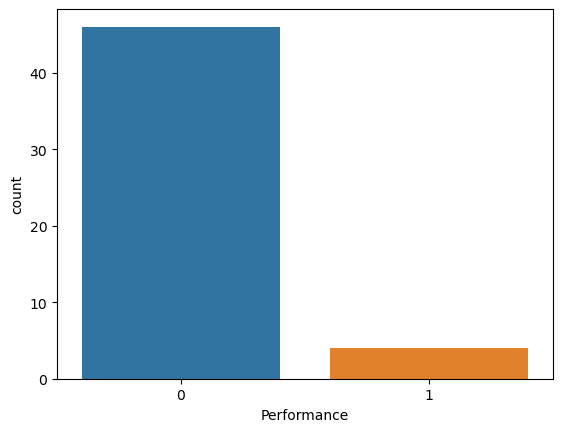

In [70]:
sns.countplot(x = 'Performance', data =performance)

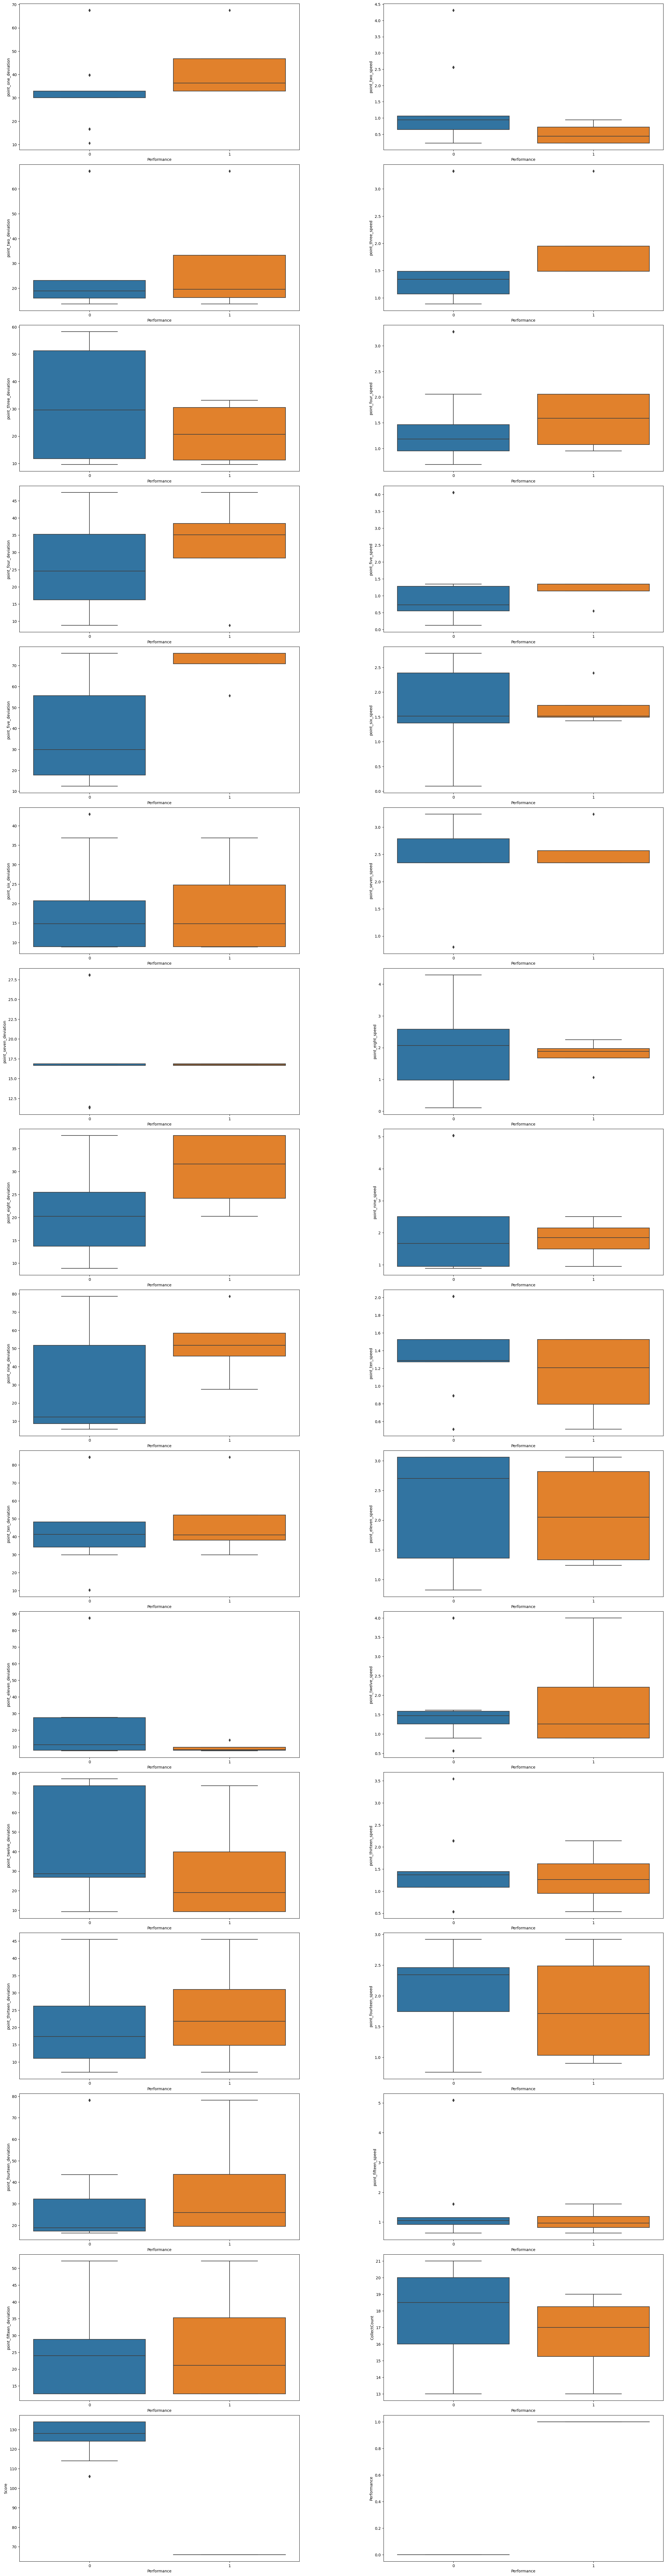

In [71]:
fig,axes=plt.subplots(nrows=16,ncols=2,figsize=(30,120))
fig.subplots_adjust(hspace=.10,wspace=.3)
axes=axes.ravel()

for i,col in enumerate(performance.columns[1:]):
   _=sns.boxplot(y=col,x='Performance',data=performance,ax=axes[i])

In [72]:
corrMatt = performance.corr()
#Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(200, 120))
plt.title('Point Performance Correlation')
#Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
           ax=ax, annot=True, fmt='.2g', linewidths=1)

<Axes: title={'center': 'Point Performance Correlation'}>

In [84]:
# Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Load the dataset
performance = pd.read_csv('labeled_data.csv')
performance = performance.astype(np.float32)
# Preprocess the data
X = performance.drop(columns=['Performance'])
X = performance.drop(columns=['Score'])
X = performance.drop(columns=['CollectCount'])
y = performance['Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

# Define the neural network architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Evaluate the model on test data
scores = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %.2f%%' % (scores[1]*100))

Epoch 1/100
1/1 [==============================] - 0s 200ms/step - loss: 0.0000e+00 - accuracy: 0.3667
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4667
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4667
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6333
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4667
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5667
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7667
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6333
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6000
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accu

In [85]:
new_data = pd.read_csv('labeled_data.csv')
X_new = new_data.drop(columns=['Performance']).values
y_true = new_data['Performance'].values
y_pred = model.predict(X_new)

loss, accuracy = model.evaluate(X_new, y)
print('Loss:', loss)
print('Accuracy:', accuracy)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
print('Confusion matrix:')
print(confusion)

2/2 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9200
Loss: 0.0
Accuracy: 0.9200000166893005
Confusion matrix:
[[46  0]
 [ 4  0]]


In [86]:
import tensorflow as tf
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('labeled_data.csv')

# Split the data into training and validation sets
train_size = int(0.8 * len(df))
train_df = df[:train_size]
val_df = df[train_size:]

# Define the input and output dimensions
input_dim = len(df.columns) - 1
output_dim = 1

# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[input_dim]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output_dim)
])

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Train the model
history = model.fit(train_df.iloc[:, :-1], train_df.iloc[:, -1], epochs=50,
                    validation_data=(val_df.iloc[:, :-1], val_df.iloc[:, -1]))

# Get the model's predictions on the validation set
predictions = model.predict(val_df.iloc[:, :-1])

# Calculate the correlation coefficient between each input feature and the target variable
corr_coef = []
for i in range(input_dim):
    corr_coef.append(val_df.iloc[:, i].corr(val_df.iloc[:, -1]))

# Print the correlation coefficients
for i, col in enumerate(val_df.columns[:-1]):
    print(f"{col} correlation coefficient: {corr_coef[i]}")



Epoch 1/50
2/2 [==============================] - 0s 74ms/step - loss: 17.1272 - val_loss: 4.7723
Epoch 2/50
2/2 [==============================] - 0s 18ms/step - loss: 12.7916 - val_loss: 2.6036
Epoch 3/50
2/2 [==============================] - 0s 18ms/step - loss: 7.9607 - val_loss: 2.7543
Epoch 4/50
2/2 [==============================] - 0s 18ms/step - loss: 6.4376 - val_loss: 4.7106
Epoch 5/50
2/2 [==============================] - 0s 19ms/step - loss: 6.6402 - val_loss: 3.9100
Epoch 6/50
2/2 [==============================] - 0s 18ms/step - loss: 5.5452 - val_loss: 2.3687
Epoch 7/50
2/2 [==============================] - 0s 19ms/step - loss: 4.9973 - val_loss: 2.4979
Epoch 8/50
2/2 [==============================] - 0s 17ms/step - loss: 4.0092 - val_loss: 3.9937
Epoch 9/50
2/2 [==============================] - 0s 20ms/step - loss: 3.6739 - val_loss: 5.3557
Epoch 10/50
2/2 [==============================] - 0s 19ms/step - loss: 3.7692 - val_loss: 3.4970
Epoch 11/50
2/2 [==========